1420 Assignment 1; Mohammed, Nasser
Fri, Jan 30th.

In [145]:
import numpy as np
import astropy.units as u
import astropy.constants as c

### Question 1.

Key assumptions: 

Cross section of an individual star: 1.6 x 10^-15 pc^2

Cross section of a galaxy: 3.2 x 10^8 pc^2


In [146]:
def t_relaxation(N, t_dyn):
    """
    N: Number of particles
    t_dyn: dynamical time, in Gyr
    """
    return N/(8*np.log(N))*t_dyn*u.Gyr

def t_dynamical(r, v_c):
    """
    r: radius in kpc
    v_c: circular velocity in km/s
    """
    return 2*np.pi*r*u.kpc/(v_c*u.km/u.s)

In [147]:
import pandas as pd
# - had chatGPT write the table into a DF
df = pd.DataFrame({
    "Object Type": ["globular cluster", "dwarf galaxy", "Milky Way", "galaxy group", "galaxy cluster"],
    "Radius": [0.01, 0.1, 10, 1000, 5000],
    "Velocity": [5, 10, 200, 200, 1000],
    "N": [10**5, 10**7, 10**11, 50, 10**3],
    "Particle": ["star", "star", "star", "galaxy", "galaxy"],})
print(df)

        Object Type   Radius  Velocity             N Particle
0  globular cluster     0.01         5        100000     star
1      dwarf galaxy     0.10        10      10000000     star
2         Milky Way    10.00       200  100000000000     star
3      galaxy group  1000.00       200            50   galaxy
4    galaxy cluster  5000.00      1000          1000   galaxy


In [148]:
df = df.copy()
df["Dynamical Time (Gyr)"] = pd.NA
for i, row in df.iterrows():
    v_c = row["Velocity"]
    r = row['Radius']
    t_dyn = t_dynamical(r, v_c)
    print(f'The dynamical time for object "{row['Object Type']}" is \t {t_dyn.to(u.Gyr):.3}')
    df.loc[i,'Dynamical Time (Gyr)'] = t_dyn.value

The dynamical time for object "globular cluster" is 	 0.0123 Gyr
The dynamical time for object "dwarf galaxy" is 	 0.0614 Gyr
The dynamical time for object "Milky Way" is 	 0.307 Gyr
The dynamical time for object "galaxy group" is 	 30.7 Gyr
The dynamical time for object "galaxy cluster" is 	 30.7 Gyr


In [149]:
df = df.copy()
df["Relaxation Time (Gyr)"] = pd.NA
for i, row in df.iterrows():
    N = row["N"]
    t_dyn = row["Dynamical Time (Gyr)"]
    t_relax =t_relaxation(N, t_dyn)
    print(f'The relaxation time for object "{row['Object Type']}" is \t {t_relax.to(u.Gyr):.3}')
    df.loc[i,'Relaxation Time (Gyr)'] = t_relax.value

The relaxation time for object "globular cluster" is 	 13.6 Gyr
The relaxation time for object "dwarf galaxy" is 	 4.87e+03 Gyr
The relaxation time for object "Milky Way" is 	 1.55e+08 Gyr
The relaxation time for object "galaxy group" is 	 50.2 Gyr
The relaxation time for object "galaxy cluster" is 	 5.68e+02 Gyr


In [150]:
df = df.copy()
df["Collisional Time (Gyr)"] = pd.NA
for i, row in df.iterrows():
    if row['Particle'] == 'star':
        cross_section = 1.6e-15 * u.pc**2
    elif row['Particle'] == 'galaxy':
        cross_section = 3.2e8 *u.pc**2

    n = row['N'] / (4/3*np.pi*(row['Radius']*u.kpc)**3) #particle density
    mean_free_path = (n*cross_section)**-1
    t_collide = mean_free_path/(row['Velocity']*u.km/u.s)

    print(f'The direction collisional time for particles in object "{row['Object Type']}" is \t {t_collide.to(u.Gyr):.3}')
    df.loc[i,'Collisional Time (Gyr)'] = t_collide.to(u.Gyr).value
    


The direction collisional time for particles in object "globular cluster" is 	 5.12e+09 Gyr
The direction collisional time for particles in object "dwarf galaxy" is 	 2.56e+10 Gyr
The direction collisional time for particles in object "Milky Way" is 	 1.28e+11 Gyr
The direction collisional time for particles in object "galaxy group" is 	 1.28e+03 Gyr
The direction collisional time for particles in object "galaxy cluster" is 	 1.6e+03 Gyr


In [151]:
df

,Object Type,Radius,Velocity,N,Particle,Dynamical Time (Gyr),Relaxation Time (Gyr),Collisional Time (Gyr)
0,globular cluster,0.01,5,100000,star,0.012566,13.643764,5119708100.616016
1,dwarf galaxy,0.10,10,10000000,star,0.062832,4872.772692,25598540503.080078
2,Milky Way,10.00,200,100000000000,star,0.314159,155042767.482027,127992702515.400406
3,galaxy group,1000.00,200,50,galaxy,31.415927,50.191305,1279.927025
4,galaxy cluster,5000.00,1000,1000,galaxy,31.415927,568.490147,1599.908781


Above I've calculated the dynamical, direct collisional, and relaxation time for the provided stellar systems. The most simple divide to distinguish the dynamical state of each system is those who's relaxation time is less than the age of the universe, and those greater.

Based on the numbers provided, only the globular cluster system (GC) would reach equillibrium on order t_hubble, all other systems we cannot say are in dynamical equillibrium (not accounting for phase-mixing or violent relaxation).

### Question 2.

#### a.

In [152]:
t_dynamical(8, 220).to(u.Myr)

<Quantity 223.40544439 Myr>

Above is the rotation period at the location of the Sun. Assuming the MW galaxy formed just after the Big Bang, we can calculate how many orbits have been completed:

In [153]:
sun_period = t_dynamical(8, 220).to(u.Myr)
print(f'{(13.8 * u.Gyr / sun_period.to(u.Gyr)):.2f} orbits completed')

61.77 orbits completed


#### b.

using $v_c^2 = \frac{GM(<r)}{r}$

In [154]:
M_enclosed = (220*u.km/u.s)**2*8*u.kpc/c.G
print(f'Mass enclosed at Sun\'s position: {M_enclosed.to(u.Msun):.2e}')

Mass enclosed at Sun's position: 9.00e+10 solMass


#### c.

Because our potential is cutoff at 10 $R_\odot$, we can calculate the escape velocity as

$$v_\text{esc} = \sqrt{2[\Phi(10r_\odot) - \Phi(r_{\odot})]},$$

but to do so, we must find the difference between $ \Phi(r_{\odot})$ and $ \Phi(10r_{\odot})$.

Following the textbook (eq. 3.15), we can show that the potential difference between two radii if we know $\Delta M$ between $r_\odot$ and $10r_{\odot}$:

$$ \Delta\Phi = -G \left[  \frac{M(< r_\odot) + \Delta M}{10r_\odot} - \frac{M(<r_\odot)}{r_\odot} - \frac{\Delta M}{10r_\odot - r_\odot} \ln(10r_\odot / r_\odot) \right]. $$

Once we calculate $\Delta\Phi$, we can calculate the escape velocity as (eq. 3.13)

$$v_\text{esc} = \sqrt{2[\Phi(10r_\odot) - \Phi(r_{\odot})]}.$$

To do so, we first need to calculate $\Delta M$.

Because we are assuming $v_c =$ constant for a spherical mass distribution, we require $M(<r)\propto r$, which implies $\rho(r)\propto r^{-2}$. We therefore take

$$\rho(r) = \rho_0 \left(\frac{r_0}{r}\right)^2.$$

For this density law, the enclosed mass is

$$M(<r) = \int_0^{r} 4\pi r’^2 \rho(r’),dr’ = 4\pi \rho_0 r_0^2, r.$$

Using $M(< r_\odot)$ from part b, we can set $r_0 = r_\odot$ and solve for

$$\rho_0 = \frac{M(<r_\odot)}{4\pi r_\odot^3}.$$

Then the mass between $r_\odot$ and $10r_\odot$ is

$$\Delta M = \int_{r_\odot}^{10 r_\odot} 4 \pi r^2 \rho(r) dr
= \int_{r_\odot}^{10 r_\odot} 4\pi r^2 \rho_0\left(\frac{r_0}{r}\right)^2 dr
= \int_{r_\odot}^{10 r_\odot} 4\pi \rho_0 r_0^2 dr
= 4\pi \rho_0 r_0^2 (10r_\odot-r_\odot).$$

Below I’ll code it all up.

In [132]:
rho_0 = M_enclosed.to(u.Msun)/(np.pi*4*(8*u.kpc)**3)
r_sun = 8*u.kpc
#print(f'{rho_0.to(u.Msun/u.kpc**3):.3e}')

def dM(r_1, r_2):
    return 4*np.pi*rho_0*r_sun**2*(r_2 - r_1)

DeltaM = dM(r_sun, 10*r_sun)
print(f'{DeltaM.value/1e12} x 10^12 M_sun')




0.810245764148494 x 10^12 M_sun


In [133]:
print(f'Sanity check that we recover enclosed mass at solar neighbourhood: {dM(0, r_sun).value/1e10} x 10^9 M_sun')

Sanity check that we recover enclosed mass at solar neighbourhood: 9.002730712761045 x 10^9 M_sun


In [134]:
def dPhi(M_enclosed_rsun, delta_M, r_1, r_2):
    return -c.G * ((M_enclosed_rsun + delta_M) / r_2 - M_enclosed_rsun / r_1 - (delta_M / (r_2 - r_1)) * np.log(r_2 / r_1) )

deltaPhi = dPhi(M_enclosed, DeltaM, r_sun, 10*r_sun)
v_esc_sun = np.sqrt(2*deltaPhi)
print(v_esc_sun)

472.11252578365645 km / s


#### d.

In [135]:
print(f'The orbital period for a dwarf satellite galaxy at 100 kpc is {t_dynamical(100, 220).to(u.Gyr):.3}')

The orbital period for a dwarf satellite galaxy at 100 kpc is 2.79 Gyr


In [136]:
dwarf_period = t_dynamical(100, 220).to(u.Myr)
print(f'{(13.8 * u.Gyr / dwarf_period.to(u.Gyr)):.2f} orbits completed')

4.94 orbits completed


#### e.

What do we assume the cutoff is? If its still 10kpc, 

### Question 3.

#### a.

In [137]:
def potential(r, b):
    return -b/r+(1-b)*r**2 # Using G=1

array_b = np.array([0, 0.25, 0.75, 1])

v_0 = np.array([0, 0.8])
x_0 = np.array([1, 0])

In [138]:
energies = {}
angular_momenta = {}

for b in array_b:
    E = 0.5*np.linalg.norm(v_0)**2 + potential(np.linalg.norm(x_0), b)
    L = x_0[0]*v_0[1] - x_0[1]*v_0[0]
    energies[float(b)] = E
    angular_momenta[float(b)] = L
    print(f'Energy: {E:.2f} \t Angular Momentum Lz: {L:.2f}')

Energy: 1.32 	 Angular Momentum Lz: 0.80
Energy: 0.82 	 Angular Momentum Lz: 0.80
Energy: -0.18 	 Angular Momentum Lz: 0.80
Energy: -0.68 	 Angular Momentum Lz: 0.80


#### b.

Text(0.5, 0, 'r')

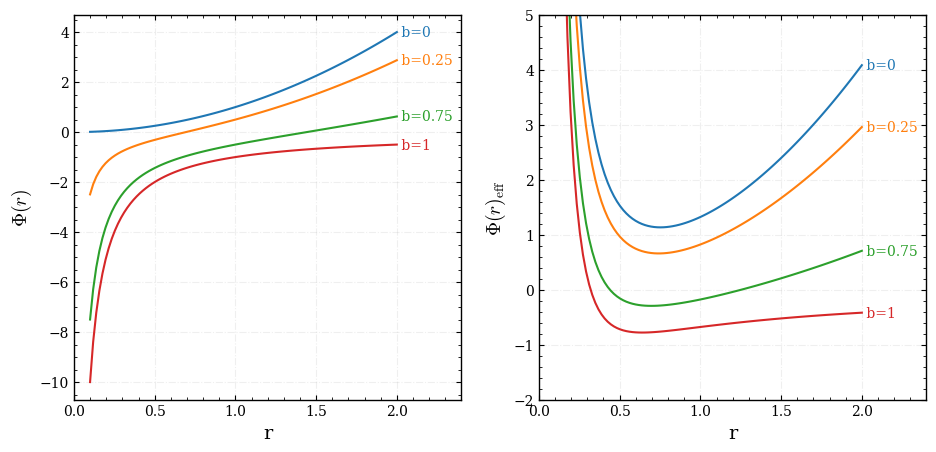

In [139]:
import matplotlib.pyplot as plt
fig, [ax, ax1] = plt.subplots(1, 2, figsize=(11, 5))

r_array = np.linspace(0.1, 2, 100)

for b in array_b:
    y = potential(r_array, b)
    (ln,) = ax.plot(r_array, y)
    ax.text(r_array[-1], y[-1], f" b={b:g}", va="center", color=ln.get_color())
    ax.set_xlim(0, 2.4)

ax.set_ylabel(r'$\Phi(r)$', fontsize=14)
ax.set_xlabel('r', fontsize=14)

def effective_potential(x, v, r, b):
    Phi = potential(r, b)
    L = x[0]*v[1] - x[1]*v[0]
    return Phi + L**2/(2*r**2)

for b in array_b:
    y = effective_potential(x_0, v_0, r_array, b)
    (ln,) = ax1.plot(r_array, y)
    ax1.text(r_array[-1], y[-1], f" b={b:g}", va="center", color=ln.get_color())


ax1.set_xlim(0, 2.4)
ax1.set_ylim(-2, 5)
ax1.set_ylabel(r'$\Phi(r)_\text{eff}$', fontsize=14)
ax1.set_xlabel('r', fontsize=14)

#### c.

#### d.

Integrating the orbit of b for ~5 radial oscillations. #How did you guys do it?

In [140]:
circ = 2*np.pi
circ/0.8*5

39.269908169872416

In [141]:
# use units where GM = 1
GM = 1.0

r_0 = 1
pos_0 = np.array([r_0, 0])
vel_0 = np.array([0, 0.8])

def potential3(pos, b):
    r = np.sqrt(pos[0]**2 + pos[1]**2)
    return -b/r + (1-b)*r**2

def _ax(pos, b):
    r = np.sqrt(pos[0]**2 + pos[1]**2)
    return -(b/r**3+2*(1-b))*pos[0]

def _ay(pos, b):
    r = np.sqrt(pos[0]**2 + pos[1]**2)
    return -(b/r**3+2*(1-b))*pos[1]


def verlet_step(pos, vel, b, dt):
    x, y   = pos[0], pos[1]
    vx, vy = vel[0], vel[1]
    ax = _ax(pos, b)
    ay = _ay(pos, b)

    # next position
    x_n1 = x + vx*dt + 0.5*ax*dt**2
    y_n1 = y + vy*dt + 0.5*ay*dt**2

    pos_n = np.array([x_n1, y_n1])

    # next acceleration
    ax_n1 = _ax(pos_n, b)
    ay_n1 = _ay(pos_n, b)

    # next velocity

    vx_n1 = vx+0.5*(ax+ax_n1)*dt
    vy_n1 = vy+0.5*(ay+ay_n1)*dt

    vel_n = np.array([vx_n1, vy_n1])

    return pos_n, ax_n1, ay_n1, vel_n


In [142]:
dt = 0.01
t_array = np.arange(0, 30, dt)

x_array = np.zeros_like(t_array)
y_array = np.zeros_like(t_array)

x_array[0] = pos_0[0]
y_array[0] = pos_0[1]

vx_array = np.zeros_like(t_array)
vy_array = np.zeros_like(t_array)

vx_array[0] = vel_0[0]
vy_array[0] = vel_0[1]


results = {}
for b in array_b:
    x_array  = np.zeros_like(t_array)
    y_array  = np.zeros_like(t_array)
    vx_array = np.zeros_like(t_array)
    vy_array = np.zeros_like(t_array)


    x_array[0], y_array[0]   = pos_0
    vx_array[0], vy_array[0] = vel_0

    for i in range(len(t_array) - 1):
        pos_n = np.array([x_array[i], y_array[i]])
        vel_n = np.array([vx_array[i], vy_array[i]])

        pos_n1, ax_n1, ay_n1, vel_n1 = verlet_step(pos_n, vel_n, b, dt)

        x_array[i+1], y_array[i+1]   = pos_n1
        vx_array[i+1], vy_array[i+1] = vel_n1

    results[float(b)] = {"t": t_array.copy(),"x": x_array.copy(),"y": y_array.copy(),"vx": vx_array.copy(),"vy": vy_array.copy()}

    


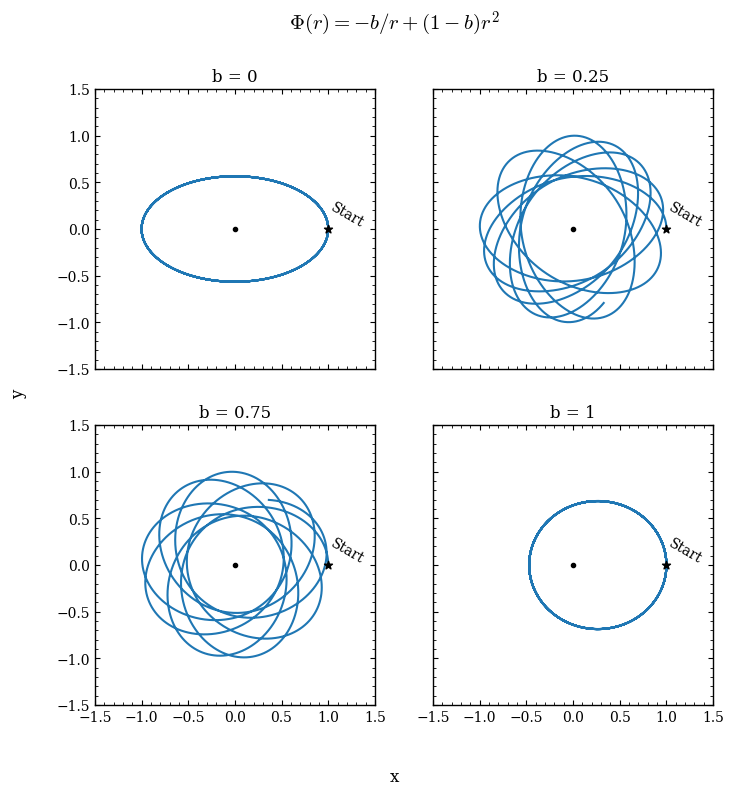

In [143]:
import matplotlib as mpl
mpl.rcParams.update({
    'font.family': 'serif',
    'mathtext.fontset': 'cm',
})

fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
axes = axes.ravel()

fig.suptitle(r"$\Phi(r) = -b/r + (1-b)r^2$", fontsize=15)
fig.supylabel("y")
fig.supxlabel("x")

for ax, b in zip(axes, list(results.keys())[:4]):
    out = results[b]
    ax.plot(out["x"], out["y"])
    ax.scatter([out["x"][0]], [out["y"][0]], marker='*', c='k', zorder=5)
    ax.text(out["x"][0], out["y"][0], "Start", va="bottom", ha="left", rotation=-30)
    ax.scatter(0, 0, marker='.', c='k')
    ax.set_aspect('equal')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.grid(alpha=0)
    ax.set_title(f"b = {b:g}")




##### Animation

In [144]:
import os
import shutil

fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
axes = axes.ravel()

fig.suptitle(r"$\Phi(r) = -b/r + (1-b)r^2$", fontsize=15)
fig.supylabel("y")
fig.supxlabel("x")

if os.path.exists("orbit_frames"):
    shutil.rmtree("orbit_frames")
os.makedirs("orbit_frames", exist_ok=True)

for k, i in enumerate(range(0, len(t_array), 15)):

    for ax, b in zip(axes, list(results.keys())[:4]):
        out = results[b]
        ax.plot(out["x"][:i], out["y"][:i])
        ax.scatter([out["x"][0]], [out["y"][0]], marker='*', c='k', zorder=5)
        ax.text(out["x"][0], out["y"][0], "Start", va="bottom", ha="left", rotation=-30)
        ax.scatter(0, 0, marker='.', c='k')
        ax.set_aspect('equal')
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
        ax.grid(alpha=0)
        ax.set_title(f"b = {b:g}")

    plt.savefig(f"orbit_frames/orbit_{k}.png")
    for ax in axes:
        ax.clear()

plt.close(fig) 

#### e.